<a href="https://colab.research.google.com/github/JayaKishnani/Blueprintco.app-assignment/blob/main/OpenCV_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading libraries

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 2s (124 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
!pip install pdf2image

In [39]:
import cv2
import numpy as np
from pdf2image import convert_from_path, convert_from_bytes
from skimage.metrics import structural_similarity as ssim
from IPython.display import display, Image

In [60]:
from google.colab.patches import cv2_imshow

# PDF to image conversion

In [49]:
def conversion_of_pdf2img(path):
  with open(path, 'rb') as f:
    pdf_bytes = f.read()
  img1 = convert_from_bytes(pdf_bytes, size=800)
  return img1



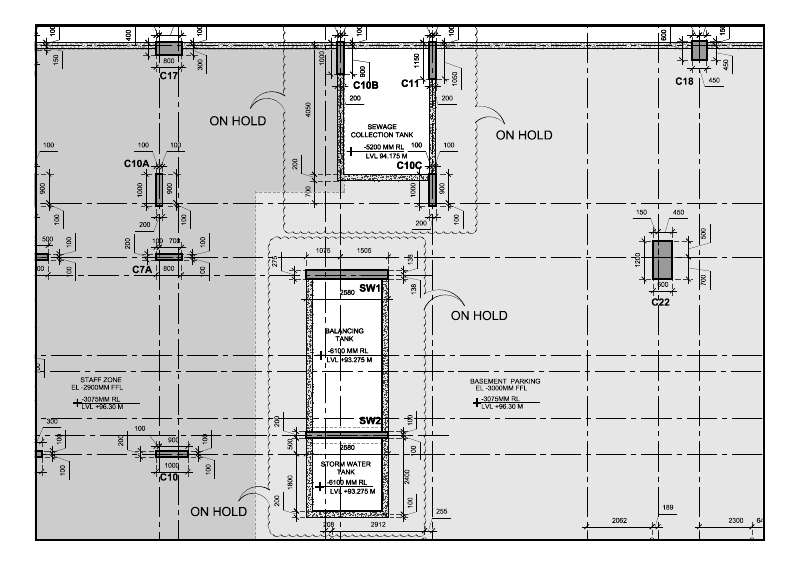

In [50]:

image1 = conversion_of_pdf2img('file_1.pdf')
display(image1[0])

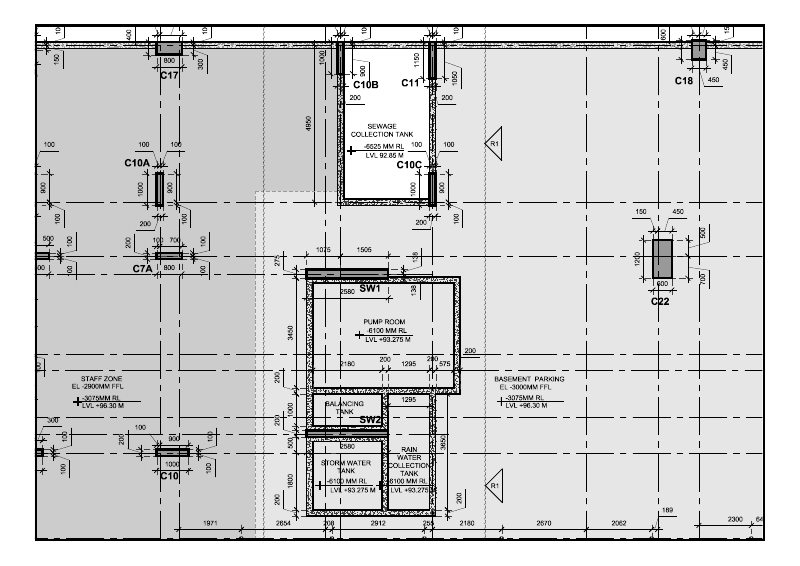

In [19]:
image2 = conversion_of_pdf2img('file_2.pdf')
display(image2[0])

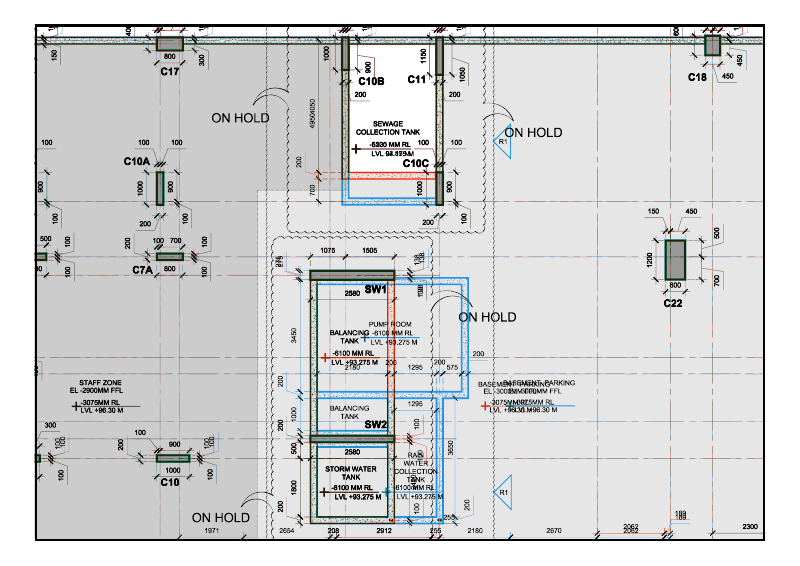

In [20]:
image3 = conversion_of_pdf2img('expected_output.pdf')
display(image3[0])

In [8]:
def compare_images(image1, image2):
  img1 = np.array(image1)
  img2 = np.array(image2)
  diff = img1 - img2
  mean_sq_err = np.mean(diff**2)
  ssim_val = ssim(img1, img2, channel_axis=2, win_size=7)
  return mean_sq_err, ssim_val

mse, ssim = compare_images(image1[0], image2[0])

print(f"Mean squared error: {mse}")
print(f"Structural similarity: {ssim}")


Mean squared error: 16.263946554770317
Structural similarity: 0.7014013531825855


In [31]:
print(image1)

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=800x566 at 0x79ED2B19F970>]


In [14]:
image3[0].mode

'RGB'

In [87]:
img1 = cv2.imread(str(image1[0]))
img2 = cv2.imread(str(image2[0]))


In [90]:
img1 = np.array(image1[0])
img2 = np.array(image2[0])

In [91]:
# Check if images were loaded successfully
if img1 is None or img2 is None:
  print("Error: Unable to load one or both images.")
else:
  # Convert images to grayscale
  gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# Masking and Mathematical operations.

In [57]:
copy1 = img1.copy()
copy2 = img2.copy()

In [58]:
Conv_hsv_Gray1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)
ret1, mask1 = cv2.threshold(Conv_hsv_Gray1, 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
copy1[mask1!= 255] = [0, 255, 0]

In [59]:
Conv_hsv_Gray2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)
# blur2 = cv2.GaussianBlur(Conv_hsv_Gray2,(2,2),0)
# ret2, mask2 = cv2.threshold(blur2, 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
ret2, mask2 = cv2.threshold(Conv_hsv_Gray2, 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
# mask2 = cv2.adaptiveThreshold(Conv_hsv_Gray2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#               cv2.THRESH_BINARY,11,1)
copy2[mask2!= 255] = [0, 255, 0]

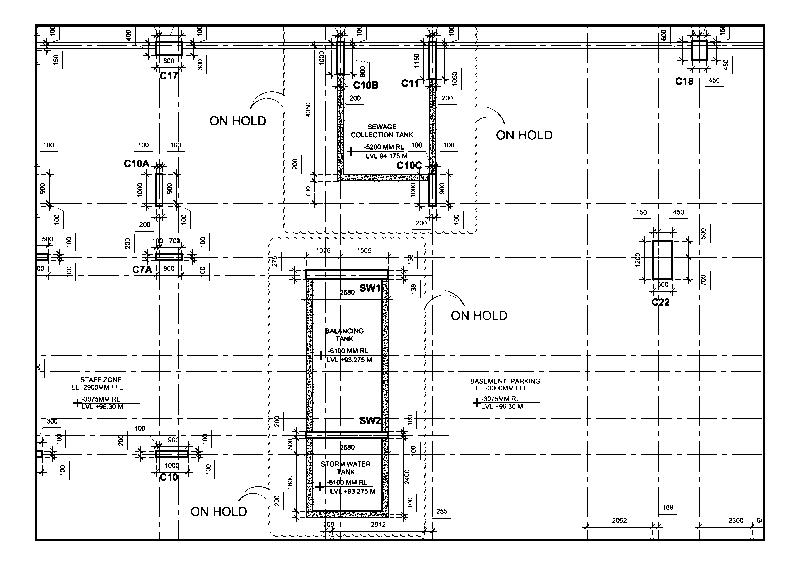

In [61]:
cv2_imshow(mask1)

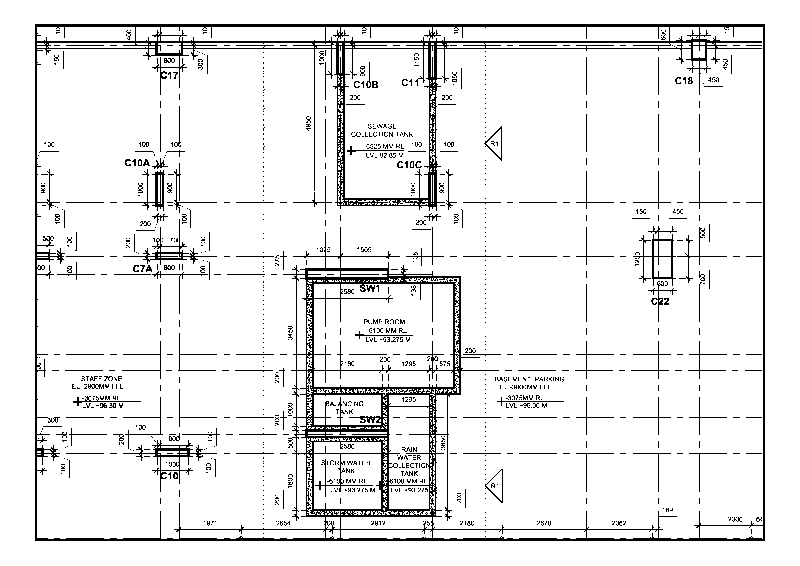

In [62]:
cv2_imshow(mask2)

In [65]:
res_mask = cv2.bitwise_xor(mask1, mask2)

In [66]:
res_mask2 = cv2.bitwise_not(res_mask)

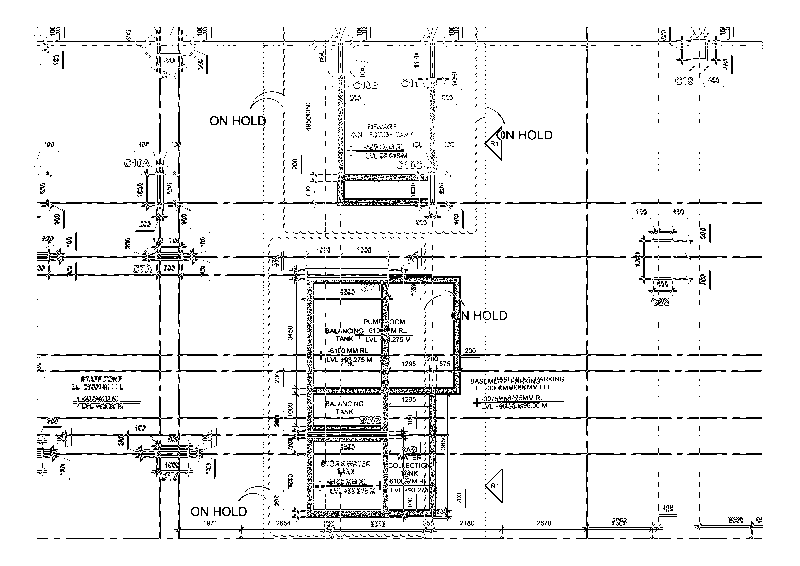

In [67]:
cv2_imshow(255-res_mask)

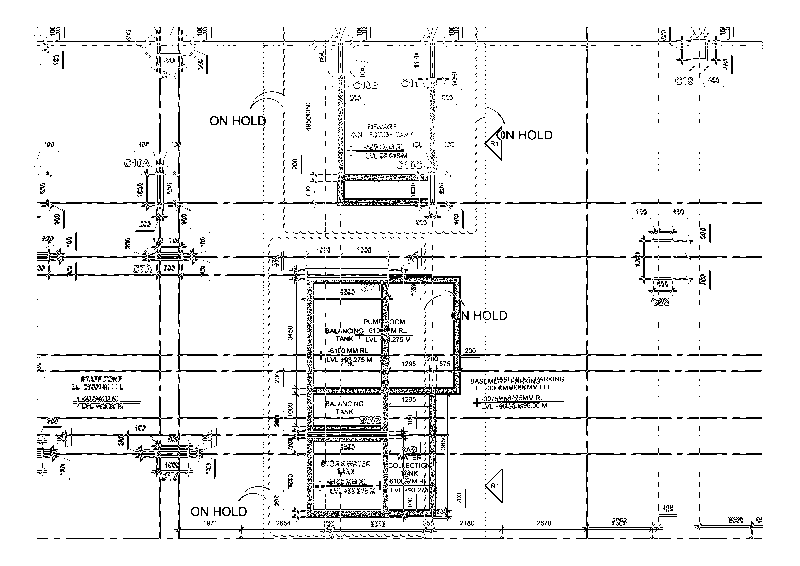

In [68]:
cv2_imshow(res_mask2)

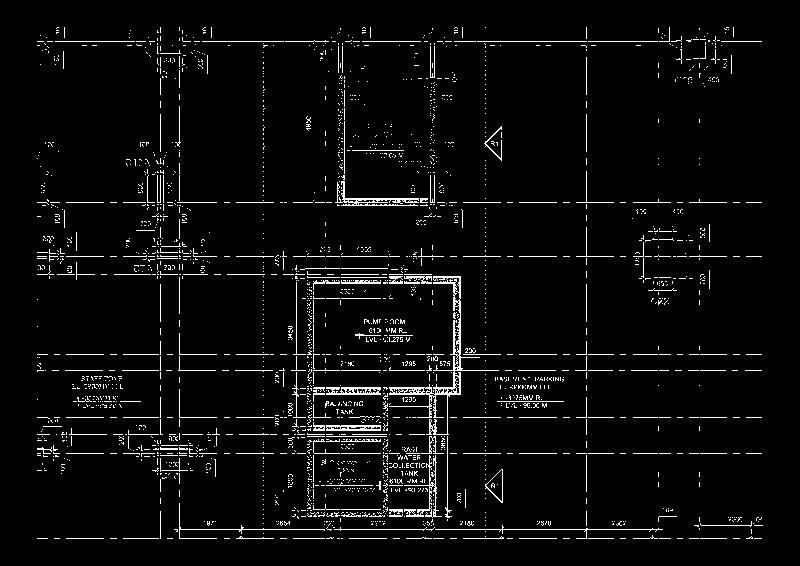

In [69]:
res_mask3 = cv2.subtract(mask1,mask2)
cv2_imshow(res_mask3)

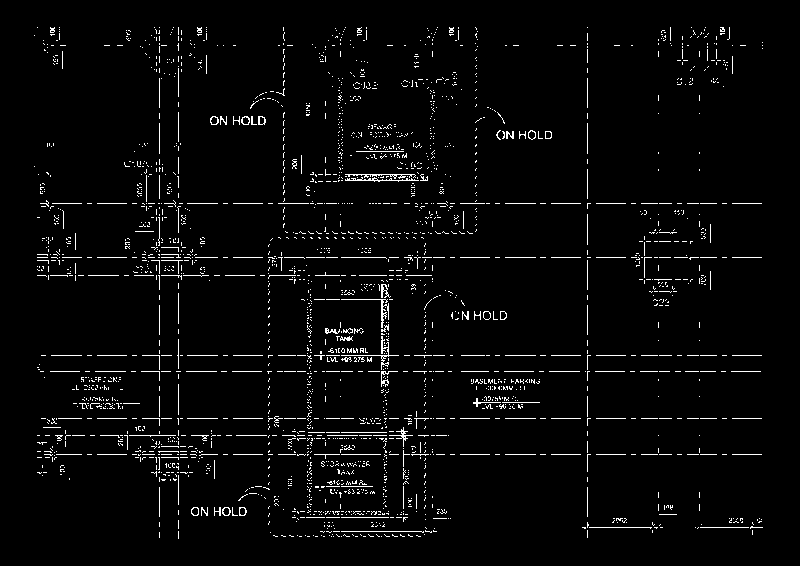

In [70]:
res_mask4 = cv2.subtract(mask2, mask1)
cv2_imshow(res_mask4)

In [71]:
# Otsu's thresholding after Gaussian filtering
blur3 = cv2.GaussianBlur(res_mask3,(1,1),0)
ret3,th3 = cv2.threshold(blur3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [72]:
# Otsu's thresholding after Gaussian filtering
blur4 = cv2.GaussianBlur(res_mask4,(1,1),0)
ret4,th4 = cv2.threshold(blur4,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [73]:
# add the coloured mask to the images to make the differences obvious
img1[(255 - res_mask3) != 255] = [255, 0, 0]
img1[(255 - res_mask4) != 255] = [0, 0, 255]

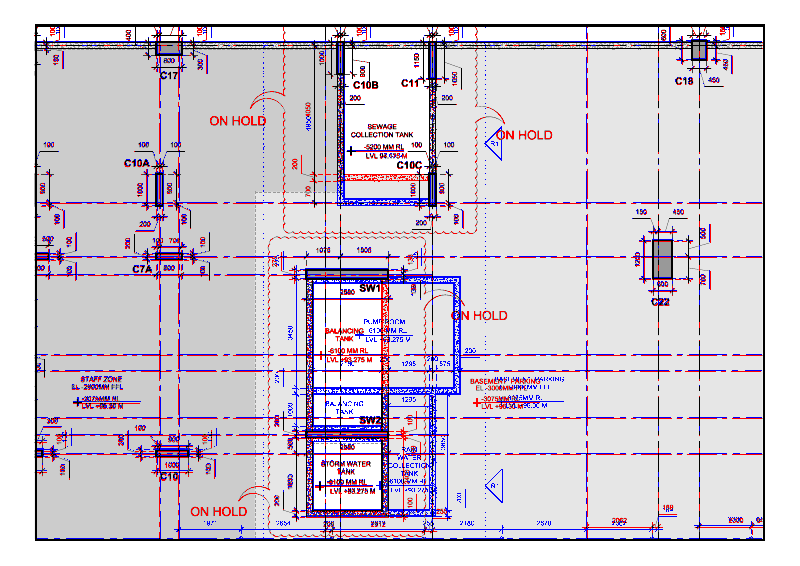

In [74]:
cv2_imshow(img1)

In [78]:
# add the coloured mask to the images to make the differences obvious
img2[(255 - th3) != 255] = [255, 0, 0]
img2[(255 - th4) != 255] = [0, 0, 255]

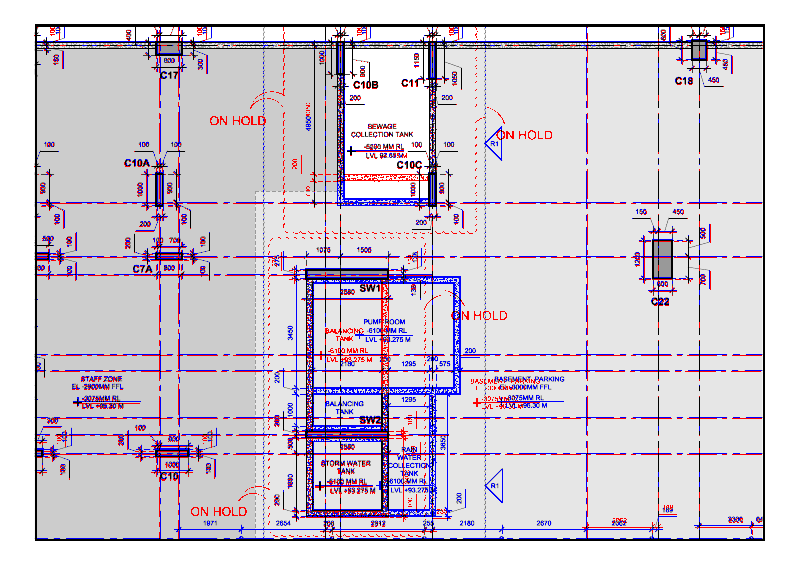

In [79]:
cv2_imshow(img2)

#Overlay

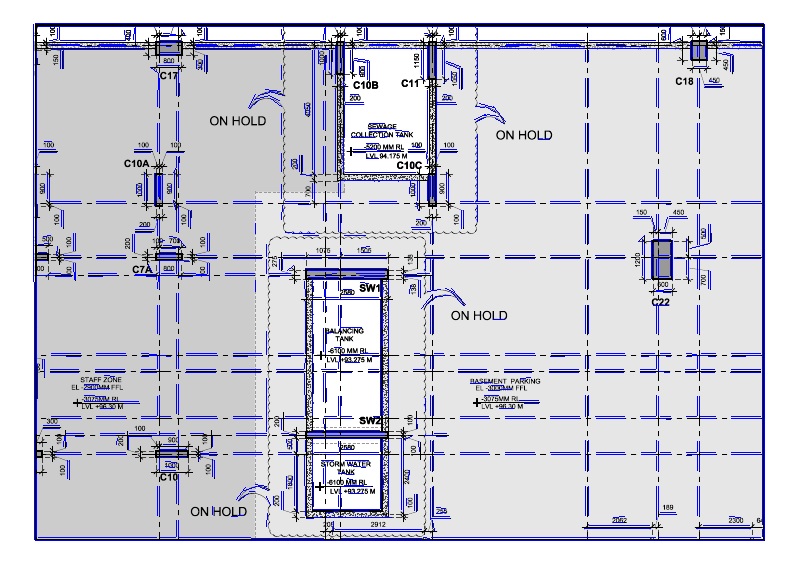

In [92]:
det = cv2.createLineSegmentDetector()

lines = det.detect(gray)[0]

for line in lines:
    x1, y1, x2, y2 = map(int, line[0])
    cv2.line(img1, (x1, y1), (x2, y2), (255, 0, 0), 1)


# det.drawSegments(img1, lines)

cv2_imshow(img1)

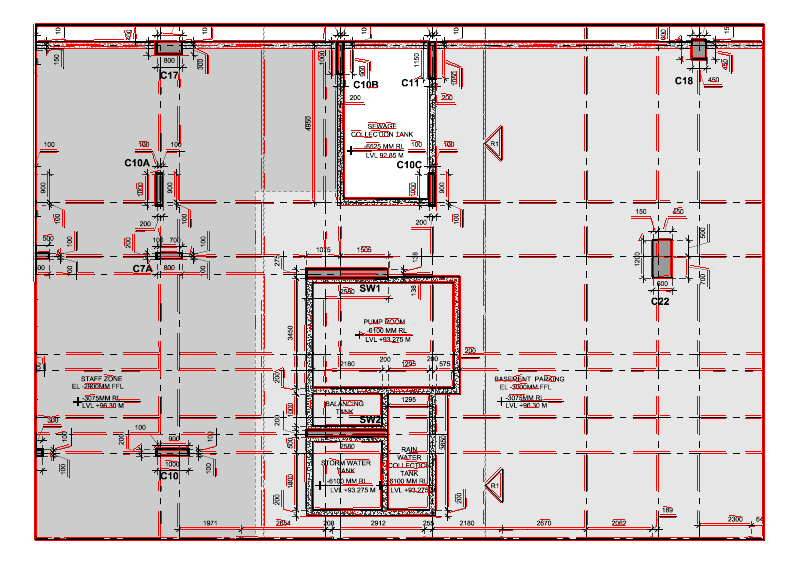

In [93]:
lines2 = det.detect(gray2)[0]

for line in lines2:
    x1, y1, x2, y2 = map(int, line[0])
    cv2.line(img2, (x1, y1), (x2, y2), (0, 0, 255), 1)


# det.drawSegments(img2, lines2)

cv2_imshow(img2)

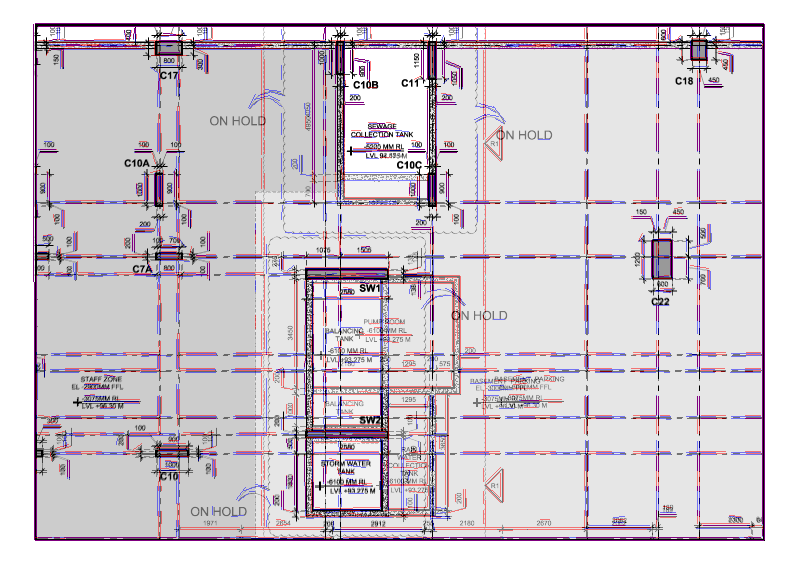

In [94]:
# Define the weight for each image (1.0 means full opacity)
alpha = 0.5  # Weight for the first image
beta = 0.5   # Weight for the second image
gamma = 0

# Overlay the images
overlay = cv2.addWeighted(img1, alpha, img2, beta, gamma)

cv2_imshow(overlay)